In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

Loading the data:

In [2]:
data = pd.read_excel("Data.xlsx")

Assessing the data:

In [3]:
data.shape

(10683, 11)

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data.dropna(inplace = True)

In [7]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Data Preprocessing:
Converting the datetime columns to their correct format:

In [8]:
def convert_to_datetime(a_list,a_dataframe):
    for col in a_list:
        a_dataframe[col] = pd.to_datetime(a_dataframe[col])    

In [9]:
convert_to_datetime(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], data)

In [10]:
# Checking the changes:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Slicing the datetime columns to month/day/year columns: (mdy: month-day-year)


In [11]:
def convert_to_mdy(a_list,a_dataframe):
    for col in a_list:
        a_dataframe[col+"_month"] = a_dataframe[col].dt.month
        a_dataframe[col+"_day"] = a_dataframe[col].dt.day
        a_dataframe[col+"_year"] = a_dataframe[col].dt.year
        a_dataframe.drop(col,axis = 1, inplace = True) #droping the original cols

In [12]:
convert_to_mdy(['Date_of_Journey'], data)

Extracting Hours and Minutes from the datetime columns: (hm : hours-minutes)

In [13]:
def convert_to_hm(a_list,a_dataframe):
    for col in a_list:
        a_dataframe[col+"_hour"] = a_dataframe[col].dt.hour
        a_dataframe[col+"_minute"] = a_dataframe[col].dt.minute
        a_dataframe.drop(col,axis = 1, inplace = True) #droping the original cols

In [14]:
convert_to_hm(['Dep_Time', 'Arrival_Time'], data)

##### Taking care of the duration columns:
For this column we have to make sure that all rows are in one format (x hours and y minutes): xh ym. In order to this task, we use the length funcion. If a row has len() of 2, then we do nothing, it means that it already has xh and ym in it. But when the len() is lesser than 2 we check! either we add the 0h or we add the 0m to the row.

In [15]:
data_backup = data.copy(deep = True) #creating a backup

defining a function to fix the hours/minutes in rows:
spliting the "duration" column by hour and minute and create two new columns:

In [16]:
def fix_hm(column,a_dataframe):
    col = list(a_dataframe[column])
    for i in range(len(col)):
        if len(col[i].split(" "))==2:
            pass
        else:
            if 'h' in col[i]:
                col[i] = col[i] + ' 0m'
            else:
                col[i] = '0h ' + col[i]
    a_dataframe[column] = col
    def hour (x):
        return x.split(" ")[0][0:-1] #to get the number only and drop the "h"(h is the last character)
    def minute (x):
        return x.split(" ")[1][0:-1] #to get the number only and drop the "m"(m is the last character)
    a_dataframe[column+"_hours"] = a_dataframe[column].apply(hour)
    a_dataframe[column+"_mins"] = a_dataframe[column].apply(minute)
    a_dataframe.drop(column,axis = 1, inplace = True)


In [17]:
fix_hm("Duration",data)

In [18]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_month,Date_of_Journey_day,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [19]:
data.dtypes

Airline                  object
Source                   object
Destination              object
Route                    object
Total_Stops              object
Additional_Info          object
Price                     int64
Date_of_Journey_month     int64
Date_of_Journey_day       int64
Date_of_Journey_year      int64
Dep_Time_hour             int64
Dep_Time_minute           int64
Arrival_Time_hour         int64
Arrival_Time_minute       int64
Duration_hours           object
Duration_mins            object
dtype: object

converting hour and minute data types from object to integer:

In [20]:
def convert_type(a_list,a_dataframe,a_type):
    for col in a_list:
        a_dataframe[col] = a_dataframe[col].astype(a_type)

In [21]:
convert_type(["Duration_hours", "Duration_mins"], data, int) #will convert to intger (int32)

defining categorical variables and integer/continous variables:

In [22]:
data_cat_list = [col for col in data.columns if data[col].dtype == "O"]
data_cat_list

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [23]:
data_cnt_list = [col for col in data.columns if data[col].dtype != "O"]
data_cnt_list

['Price',
 'Date_of_Journey_month',
 'Date_of_Journey_day',
 'Date_of_Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [37]:
data_cat = data[data_cat_list]
data_cat.head() #our categorical dataset that needs to be encoded!

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


Visualizing the data in order to assessing it better:

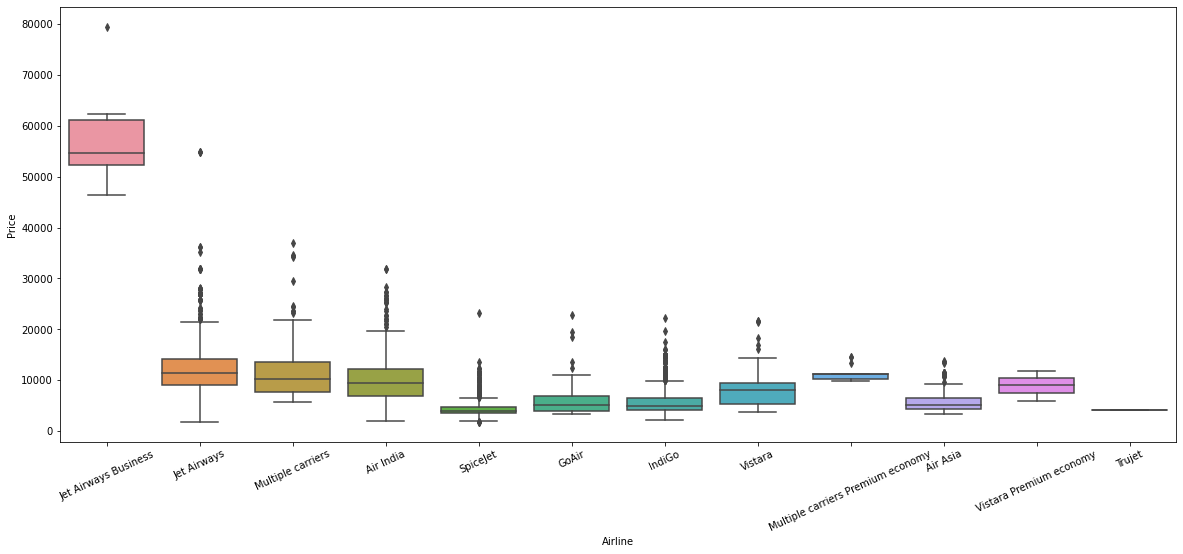

In [38]:
plt.figure(figsize = (20,8))
sns.boxplot(x = "Airline", y = "Price", data = data.sort_values("Price", ascending=False))
plt.xticks(rotation=25);

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

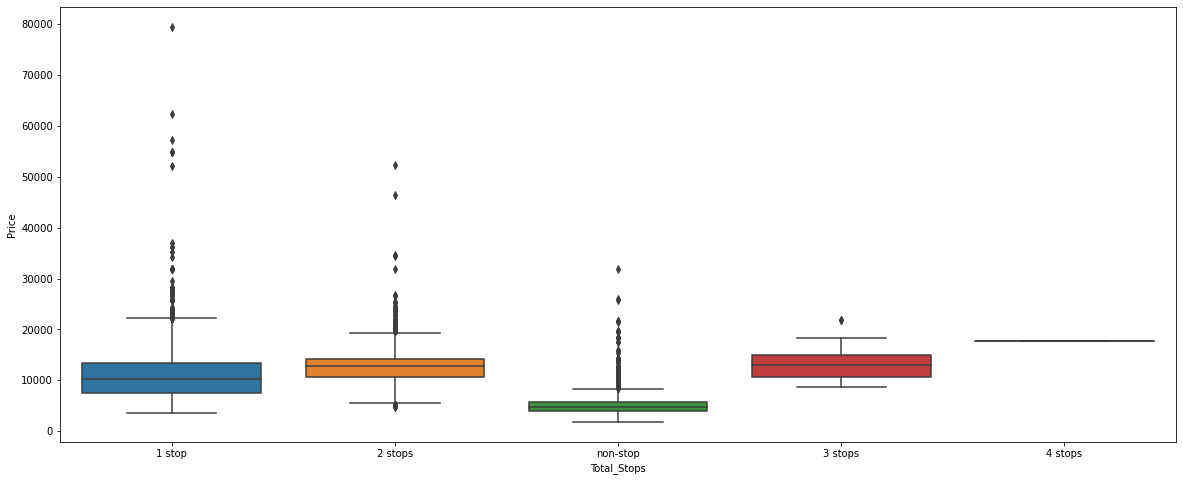

In [39]:
plt.figure(figsize = (20,8))
sns.boxplot(x = "Total_Stops", y = "Price", data = data.sort_values("Price", ascending=False))

<AxesSubplot:xlabel='Source', ylabel='Price'>

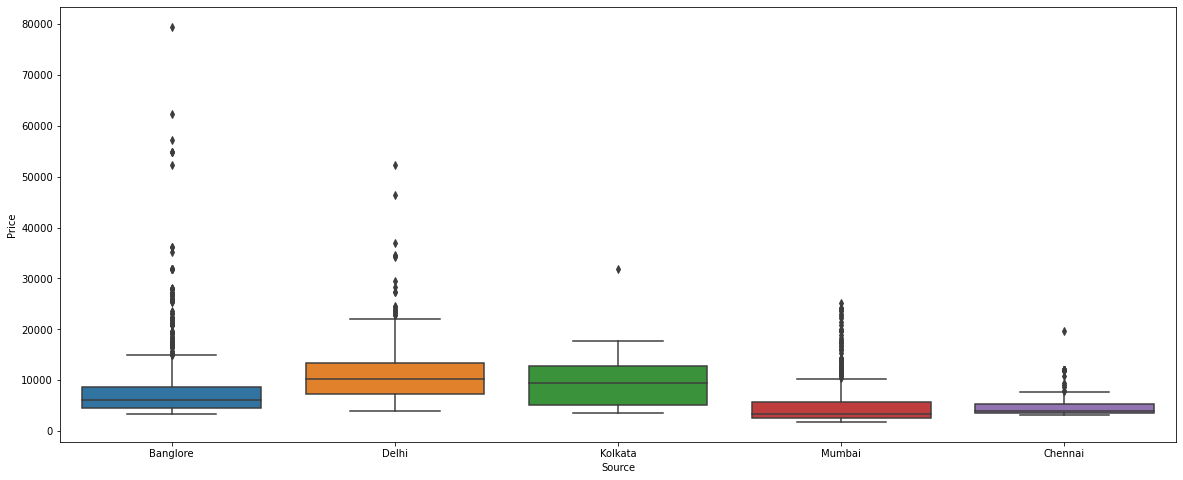

In [40]:
plt.figure(figsize = (20,8))
sns.boxplot(x = "Source", y = "Price", data = data.sort_values("Price", ascending=False))

<AxesSubplot:xlabel='Destination', ylabel='Price'>

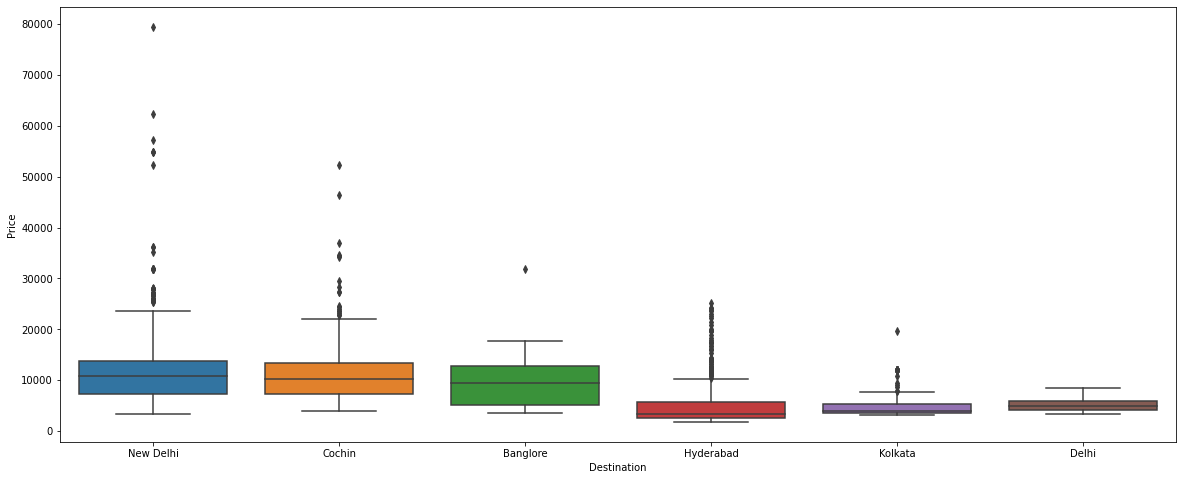

In [41]:
plt.figure(figsize = (20,8))
sns.boxplot(x = "Destination", y = "Price", data = data.sort_values("Price", ascending=False))

Dumifying the categorical features:

In [42]:
Destination = pd.get_dummies(data_cat['Destination'], drop_first = True)  
Source =pd.get_dummies(data_cat['Source'], drop_first = True)  
Airline =pd.get_dummies(data_cat['Airline'], drop_first = True)  

In [52]:
#for example:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Taking care of the route column using string split method (by delimter "→") and creating new columns for each route (eg. route 2)

In [31]:
#>>>> no function method:

# data_cat["Route_1"] = data_cat["Route"].str.split("→").str[0]
# data_cat["Route_2"] = data_cat["Route"].str.split("→").str[1]
# data_cat["Route_3"] = data_cat["Route"].str.split("→").str[2]
# data_cat["Route_4"] = data_cat["Route"].str.split("→").str[3]
# data_cat["Route_5"] = data_cat["Route"].str.split("→").str[4]



In [83]:
#>>>> using function:
# notes about the function: 
# we need to have a dataset (a_data), a column (col), maximum no. of routes (howmany), and the delimeter 

def extract_routes(a_data,col,howmany=1,delimiter=","):
    n = 0
    for i in range(howmany):
        a_data[f"{col}_{n+1}"] = a_data[col].str.split(delimiter).str[i]
        n += 1

In [84]:
extract_routes(data_cat,"Route",5,"→")

In [34]:
#dropping more columns:
# data_cat.drop("Route", axis = 1, inplace = True)
# data_cat.drop('Additional_Info', axis = 1, inplace = True) # we don't need it!

We need to encode our route columns in order to have them prepared for our models. 

In [87]:
for i in data_cat.columns:
    print(f"{i} has total {len(data_cat[i].value_counts())} categories")

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Route has total 128 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 29 categories
Route_4 has total 13 categories
Route_5 has total 5 categories


In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
for i in ["Route_1", "Route_2", "Route_3", "Route_4", "Route_5"]:
    data_cat[i] = LabelEncoder().fit_transform(data_cat[i])

In [93]:
data_cat.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


taking care of the "Total Stops" column (replacing it with numbers):

In [94]:
data_cat["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [95]:
temp_dict = {'non-stop':0, '2 stops':2, '1 stop': 1, '3 stops':3, '4 stops':4}

In [96]:
data_cat["Total_Stops"] = data_cat["Total_Stops"].map(temp_dict)

In [97]:
data_cat.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,0,34,8,13,5


concatenating all the dummy datasets with the categorical dataset: 

In [105]:
data_final = pd.concat([data_cat, Airline, Source, Destination, data[data_cnt_list]], axis = 1)

In [106]:
data_final.drop(["Airline","Source","Destination","Date_of_Journey_year","Route","Additional_Info"], 
                axis = 1, inplace = True)
data_final.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,3,24,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,1,3,16,50,21,35,4,45


#### Taking care of outliers:

first we visualize the "Price" column to get a better understanding of our data.

In [107]:
def plot (a_data, col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(a_data[col], ax = ax1)
    sns.boxplot(a_data[col], ax = ax2)

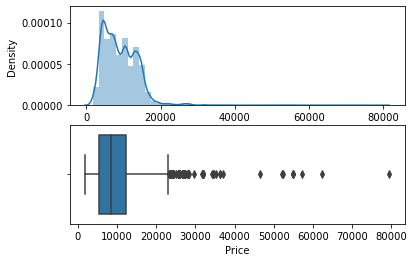

In [108]:
plot(data_final,"Price")

We use the numpy function "where" to replace the outliers with the median. Simply, it says where the Price is more or equal to 40000 it is replaced with median otherwise it uses the original value. 

In [109]:
data_final["Price"] = np.where(data_final["Price"]>= 40000, data_final["Price"].median(),data_final["Price"])

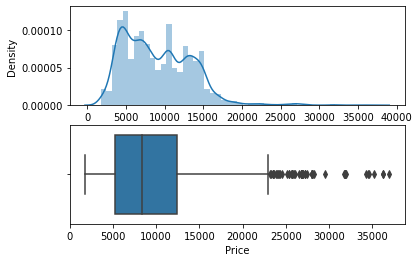

In [111]:
# assessing the changes:
plot(data_final,"Price")

#### Separating the dependent and independent variables:

In [112]:
X = data_final.drop("Price", axis = 1)
y = data_final["Price"]

#### Feature Selection:

We use sklearn's "Mutal Info Classifier" to get the importance of each feature. We need to define our dependent and independent features in its function.

In [115]:
from sklearn.feature_selection import mutual_info_classif

In [120]:
imp = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)

In [121]:
imp.columns = ["Importance"]

In [126]:
imp = imp.sort_values(by = 'Importance',ascending = False)
imp

,Importance
Route_2,2.813979
Route_3,2.234635
Total_Stops,2.121319
Route_1,2.041831
Arrival_Time_hour,1.849808
Duration_hours,1.804366
Arrival_Time_minute,1.522448
Delhi,1.509384
Cochin,1.503914
Route_4,1.486951


#### Preparing our dataset for ML models:

In [137]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 

#Models:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#### Machine Learning automation function:

In [169]:
def ml_predict(ml_model, dump = 0,features = [X_train,X_test,y_train,y_test]):
    model = ml_model.fit(X_train, y_train)
    print(f"Training Score: {model.score(X_train,y_train)}")
    predictions = model.predict(X_test)
    print(f"Predictions are {predictions}\n")
    r2_score = metrics.r2_score(y_test,predictions)
    print(f"R2 score is :{r2_score}\n")
    print(f"MAE (mean absolute error):{metrics.mean_absolute_error(y_test,predictions)}\n")
    print(f"MSE (mean squared error):{metrics.mean_squared_error(y_test,predictions)}\n")
    print(f"RMSE (root-mean-square deviation):{np.sqrt(metrics.mean_squared_error(y_test,predictions))}\n")
    sns.distplot (y_test-predictions)

    if dump == 1:
        name = str(f"{ml_model}")[:-2] #to save each model with its name
        file = open(f"{name}.pkl",'wb')
        pickle.dump(ml_model,file)

Training Score: 0.6153793528634726
Predictions are [ 7107.83638757 11338.06944053 11620.91207481 ... 12052.56797294
  8440.75383714  8918.04674705]

R2 score is :0.6171455903891843

MAE (mean absolute error):1937.011877056274

MSE (mean squared error):7371590.457775557

RMSE (root-mean-square deviation):2715.0673026235568



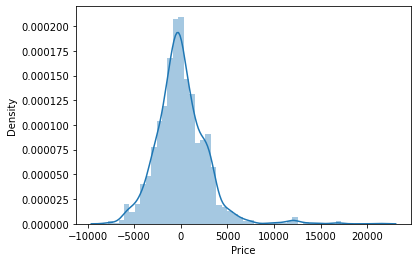

In [170]:
ml_predict(LinearRegression())

Training Score: 0.9548263674665223
Predictions are [ 9767.9        14279.95       12440.38733333 ... 10137.5885
  6338.96        8512.21      ]

R2 score is :0.8028327330576072

MAE (mean absolute error):1160.2896241765955

MSE (mean squared error):3796316.059297045

RMSE (root-mean-square deviation):1948.4137289849518



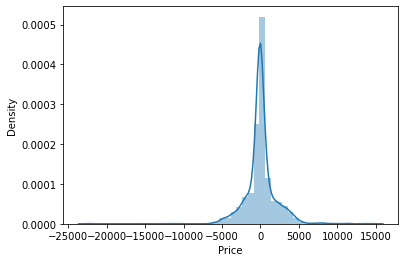

In [171]:
ml_predict(RandomForestRegressor())

Training Score: 0.7768360997316351
Predictions are [ 9980.4 12415.8 11738.6 ... 11176.8  7095.   7095. ]

R2 score is :0.6652133850332995

MAE (mean absolute error):1694.431071595695

MSE (mean squared error):6446079.121272813

RMSE (root-mean-square deviation):2538.912980248203



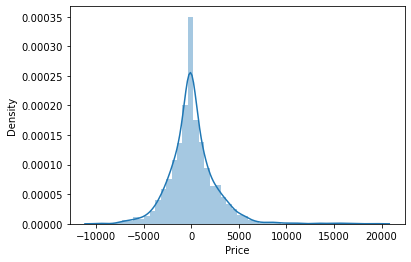

In [172]:
ml_predict(KNeighborsRegressor())

Training Score: 0.9674540929907575
Predictions are [10112. 14714. 12373. ...  9663.  6386.  7185.]

R2 score is :0.71919507174753

MAE (mean absolute error):1336.5534861956012

MSE (mean squared error):5406699.982132793

RMSE (root-mean-square deviation):2325.231167461161



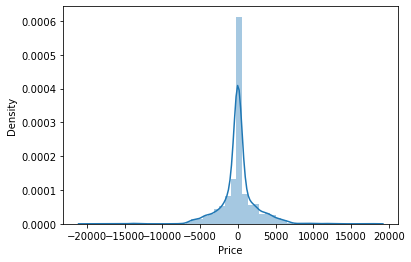

In [173]:
ml_predict(DecisionTreeRegressor())

#### Hyper-parameter tuning (Cross Validation):

In [174]:
from sklearn.model_selection import RandomizedSearchCV

In [187]:
rf_reg = RandomForestRegressor()

In [185]:
# for the random forest model:
n_estimators = [int(x) for x in np.linspace(100,1200,6)]
max_features = ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(5,30,4)]
min_samples_split = [5,10,15,100]
random_grid= {
    "n_estimators": n_estimators, 
    "max_features": max_features, 
    "max_depth": max_depth, 
    "min_samples_split": min_samples_split
}


In [188]:
rf_random = RandomizedSearchCV(estimator=rf_reg, param_distributions=random_grid,cv = 3, verbose = 2, n_jobs =-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [193]:
rf_random.best_params_
# to get the best parameteres

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

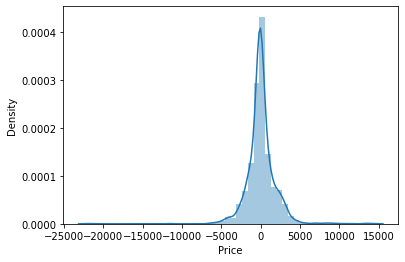

In [191]:
rf_prediction = rf_random.predict(X_test)
sns.distplot(y_test-rf_prediction);

In [192]:
metrics.r2_score(y_test,rf_prediction)

0.8327330557855059